	•	Contextual embedding, bir kelimenin anlamının cümledeki bağlama göre vektörle temsil edilmesidir.
	•	Aynı kelime farklı cümlelerde yer aldığında, model bu kelimenin her defasında anlamını bağlamdan öğrenir.
	•	Böylece, kelime için her cümlede farklı bir vektör oluşur.
	•	Bu sistemde, kelimenin sabit bir vektörü yoktur; vektörü tamamen bağlama göre belirlenir.
	•	BERT gibi modeller, kelimeyi çevresindeki diğer kelimelerle birlikte işler ve o anki anlamını hesaba katarak vektörünü üretir.
	•	Sonuç olarak, kelime her defasında kontekste göre yeni bir temsil (embedding) kazanır.



Harika, detaylı notlar için işte BERT’te embedding ve contextualization sürecinin tüm aşamaları:

⸻

📚 BERT’te Contextual Embedding Süreci – Detaylı Açıklama

🔹 1. Tokenization (Parçalama)
	•	Girdi cümlesi, BERT’in kullandığı WordPiece tokenizer ile alt token’lara ayrılır.
	•	Örneğin:
"playing football" → ["[CLS]", "play", "##ing", "football", "[SEP]"]
	•	[CLS] ve [SEP] özel token’lardır:
	•	[CLS]: Cümlenin başında yer alır, tüm cümlenin temsili olarak kullanılır.
	•	[SEP]: Cümlenin veya iki cümlenin ayrımını belirtir.

⸻

🔹 2. Embedding Oluşturma (3 ayrı embedding)

Her token için aşağıdaki 3 embedding vektörü toplanır:

✅ a. Token Embedding
	•	Her token’ın (örneğin “play”) bir başlangıç vektörü vardır.
	•	Bu vektör, modelin eğitim sürecinde öğrendiği sabit bir temsildir (ama bağlamdan bağımsızdır).

✅ b. Position Embedding
	•	Token’ın cümledeki konumunu belirtir (0, 1, 2, …).
	•	Pozisyon bilgisi, sıraya duyarsız olan transformer mimarisine konum duyarlılığı kazandırır.

✅ c. Segment Embedding
	•	BERT, iki cümlelik girişleri işleyebildiği için, her token’ın hangi cümleye ait olduğunu gösteren bir vektördür:
	•	Cümle A → Segment A
	•	Cümle B → Segment B
	•	Tek cümle varsa tüm token’lar Segment A olur.

➡️ Bu 3 embedding aynı boyuttadır (örneğin 768) ve toplanarak her token için giriş embedding’i elde edilir.

⸻

🔹 3. Transformer Katmanlarında İşleme (Contextualization)
	•	Her token’ın bu başlangıç embedding’i, BERT’in çok katmanlı transformer bloklarına verilir.
	•	Bu katmanlar:
	•	Self-attention kullanarak, her token’ın diğer tüm token’larla etkileşmesini sağlar.
	•	Böylece kelimenin bağlamı öğrenilir.
	•	Bu işlem her transformer katmanında daha da derinleşir.

⸻

🔹 4. Contextual Embedding’in Oluşması
	•	Her token, cümledeki konumuna ve çevresindeki kelimelere göre farklı bir temsil (embedding) kazanır.
	•	Aynı kelime farklı cümlelerde farklı vektörlerle temsil edilir.
	•	Örneğin: "bank" → finans bağlamında başka, nehir bağlamında başka bir vektör.

⸻

🧠 Özetle:

Başta her kelimeye sabit bir vektör atanır. Bu vektör pozisyon ve segment bilgisiyle birleşir. Ardından transformer katmanlarında bu vektör bağlama göre işlenir ve contextual (bağlamlı) embedding elde edilir.

⸻

İstersen bu yapıyı bir tablo veya diyagram olarak da hazırlayabilirim. PDF notuna eklemek ister misin?

Segment embedding, BERT modelinde birden fazla cümle içeren girdilerde, her kelimenin hangi cümleye ait olduğunu belirtir.
Böylece model, Next Sentence Prediction (NSP) gibi görevlerde cümleleri ayırt edebilir.

## Attention is all you need

### Positional Embedding
Her pozisyon (0, 1, 2, …) için modelde önceden tanımlı bir vektör vardır.
Bu vektörler ya matematiksel olarak hesaplanır (sin/cos), ya da model eğitilirken öğrenilir.

Bir kelimenin contextual anlamı için genelde 3 aşama vardır:

    1. Query
    2. Key
    2. Value

Query: Aslında bu tam olarak bir aşama değildir.Elimizde bir kelime var ve bu kelimeden contextual anlam çıkarmaya çalışıyoruz.
Query de tam da budur.Ben bu kelimeden bir anlam çıkarıcam bu kelime aslında ne anlamdadır demektir query.

Key: Key, querydeki kelimenin aslında ne anlamda oldugunu anlayabilmek için o cümledeki elemanlardan ne kadar etkilendiğini hesaplamaktır.Her kelimenin bir katkısı vardır querydeki kelimeye.Örnegın biri kelimeden 2 önceki kelimenin bir sıfatıdır.biri asıl kelimenin bir niceleyicisidir.

Value: Valuelar asıl olarak key ile queryin birleşmiş halidir.Keyde her kelimenin kendi anlamını query kelimesine ne anlamda etkilediğidir.Örnegın 2 kelime öncesindeki kelimenin sıfatı asıl kelimeye bir anlam katmıştır.işte tamda o dur value.Her keyin bir valuesi vardır.

Bir self attention kısmı vardır bu transformers katmanında.Burda başlatılan w_q, w_k, w_v bulunmaktadır.Bunlar birer katmandır aslında FC olan.Bunların parametrelerini biz Q, K, V vektörleri elde etmekde kullanıyoruz.

Peki öyleyse bu w vektörleri nedir.Bunlar aslında daha önce dediğim query, key, value kısımlarında bulmak için kullanılan matrislerdir.matristen kastım aslında bir FC katmanı parametreleri.Bunlar her eğitimde normal bir nöron gibi eğitilip lossu Back propagationla değiştirilir ve en iyi hali almaya çalışılır.

Tüm eğitim bitince bu 3 vektör son halini almış oluyorlar.Bu haller sonrasında asıl contextual vektör elde etmek için kullanıyoruz bunları.
### BU AŞAMAYA INFERENCE KISMI DENMEKTEDİR.

Kısaca aslında bu ınference kısmından önce modelin katmanlarından bazılarının parametreleridir bu w vektörleri.

Her kelimenin static vektörü ile w_q çarpılarak Q vektörleri elde edilir ve kelimenin.

Her kelimenin static vektörü ile w_k çarpılarak K vektörleri elde edilir.

Daha sonra bunları her kelime için çarpıp softmax katmanına sokuyoruz.

#### SOFTMAX KATMANI: Bu katman giren tüm girdilere göre toplamı 1 olcak şekilde olasılıkları verir.

Softmax çıktısına göre her kelimenin ne kadar etkileyecegı bulunmuş oluyor.

Aşagıda bunun hem bazı formul kısmı hemde ilgili fotografını koydum anlaşılması için.

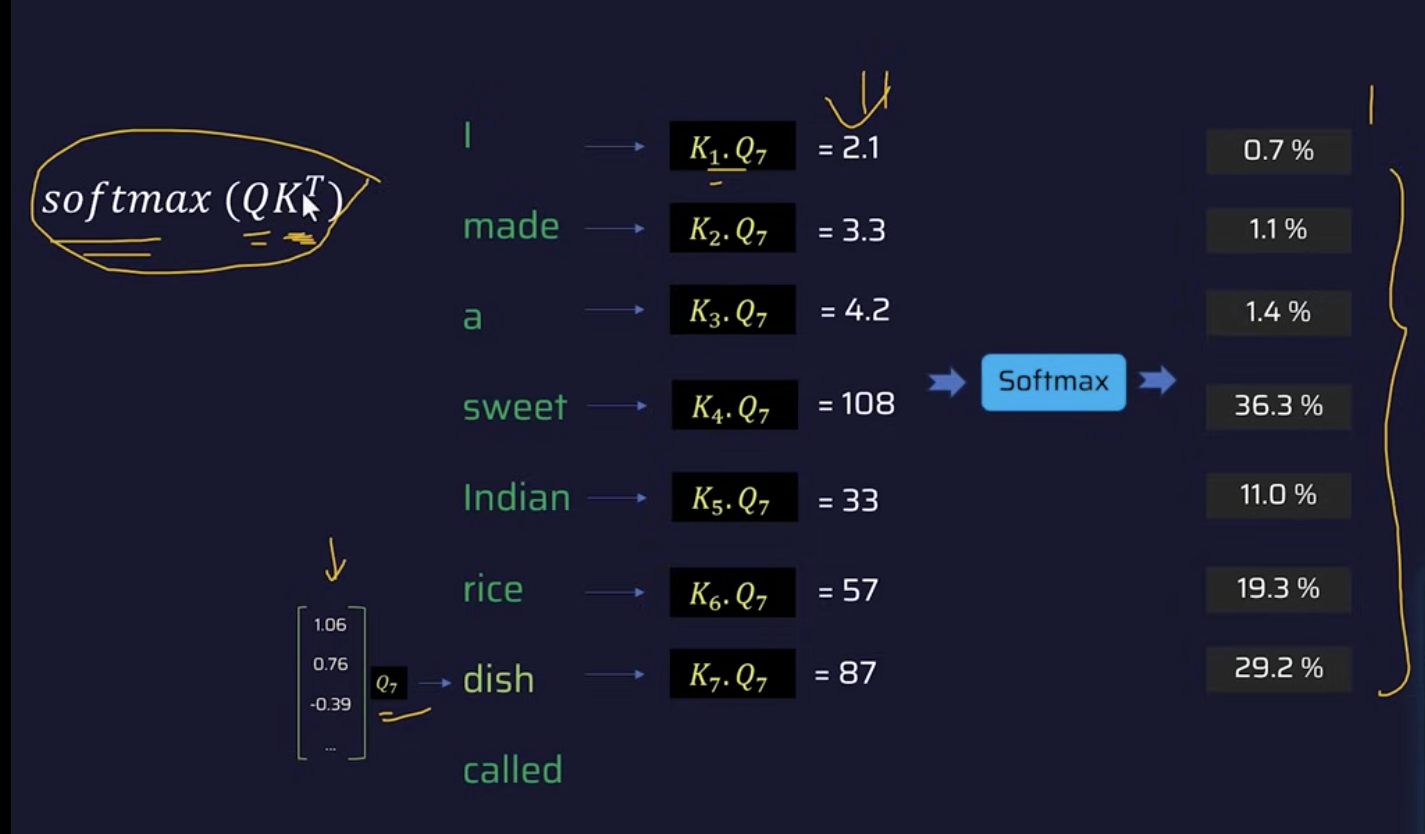

In [2]:
from PIL import Image
from IPython.display import display
# Open the PNG file
image = Image.open('Screenshot 2025-05-07 at 14.48.57.png')

display(image)

Bu yukarıdaki işlemde Q ve K transpoz çarpımını K vektörünün dimentionunun karekoküne bölkükten sonra Softmax katmanından geçirdikten sonra elimizde bir olaslılıkların oldugu bir vektör çıkıcak.

Daha sonra Q hesaplarken yaptıgımız gibi her elemanın static vektörü ile w_v ile çarpıp V vektörleri buluyoruz.Daha sonra bunların hepsini topluyoruz cümledeki her V vektörünü.

Bu yukarıdaki iki sonucu aşagıdaki gibi çarpıyoruz ve elimize bir Attention vektörü geliyor o kelime için.

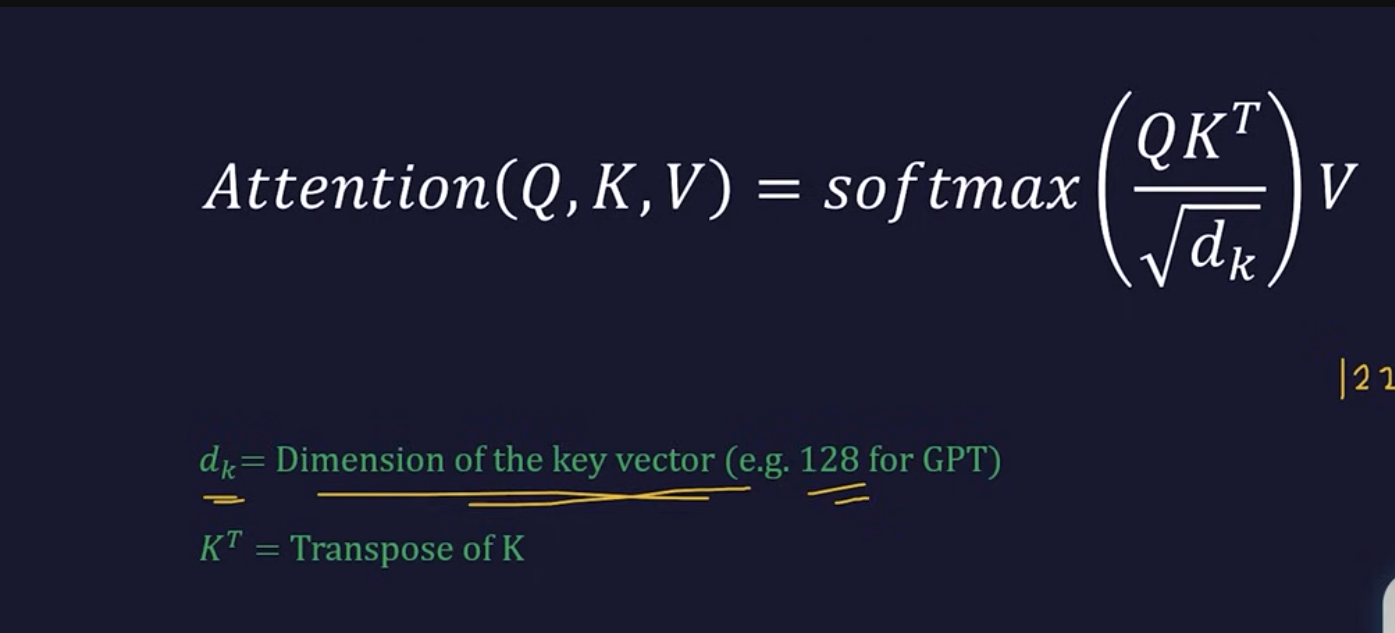

In [15]:
image = Image.open('Screenshot 2025-05-07 at 15.01.58.png')

display(image)

Contextual embedding, self-attention  kullanılarak transformer katmanlarında üretilen bağlamsal vektör temsildir.

## Multi-head Attention

Bizim bu yukada yaptıgımız sadece 1 head işlemidir.Aslında bir bert, gpt modelinde birden fazla head vardır.Buna multi-head attention denmektedir.

Bu birden fazla headde birbirinden farklı şeyler ögrenilmektedir.Örnegın biri sadece sıfatlarla ilgili şeyleri ögrenirken diğerleri daha farklı sıfatları, birbiri arasındaki ufak tefek ince detayları anlamaktadır.Herbiri ayrı anlam çözmektedir.Farklı bakış açılarını yakalamak için kısaca.

Örnek olarak bert_base de 12 tane enconder ve her encoderda 12 tane attention header vardır bu baglamda toplam 144 tane attention head vardır.

The purpose of multiple attention heads
is to allow the model to focus on
different aspects or types of
relationships between tokens (e.g.,
semantic, positional, syntactic)
simultaneously, enriching the contextual
understanding of each token.

Multi-head attention‘da tüm head’lerin girişleri aynıdır, ancak her head farklı bir şekilde işlem yapar. Yani, her head bağımsız olarak aynı giriş verisiyle çalışır, fakat her biri farklı bir perspektiften query (Q), key (K) ve value (V) matrisleri ile işlem yaparak farklı bir sonuç elde eder.


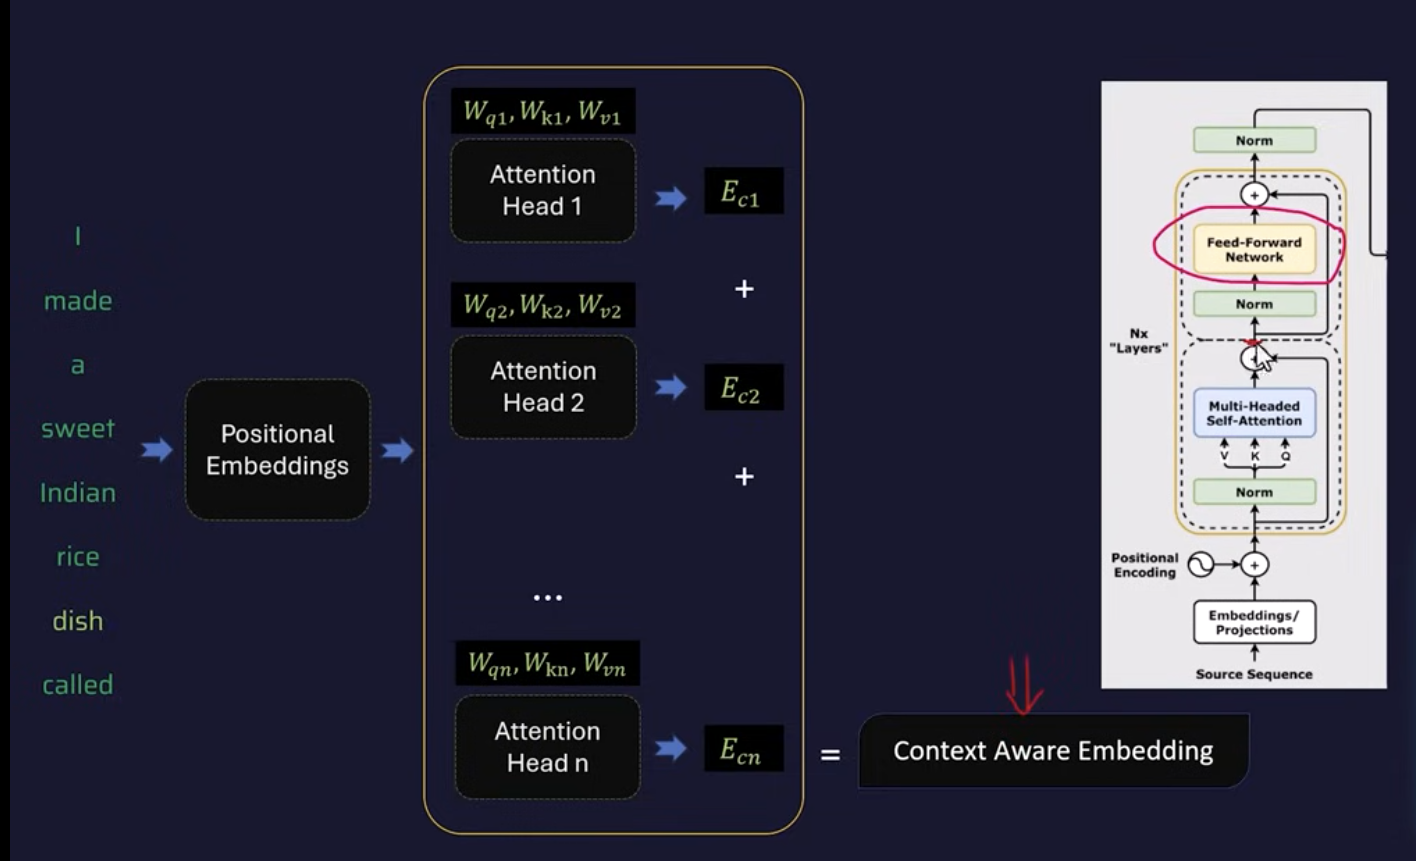

In [3]:
image = Image.open('Screenshot 2025-05-07 at 15.56.52.png')

display(image)

Yukarıda da dediğim şeyin görsel hali bulunmaktadır.Burdan da anlaşılmaktadır dediklerim.

Bütun head çıkışları toplanarak bir context aware embedding elde edilir o kelime için.

The Feed-Forward Network (FFN) enriches
each token's embedding by applying non-
linear transformations independently,
enabling the model to capture complex
patterns and higher-order features beyond
contextual relationships.

Feed forward network ile non linear şekilde elimizdeki vektörü daha da zenginleştiriyoruz.Hem multi-head çıktısını hemde FFN çıktısını toplayarak yapılıyor bu.

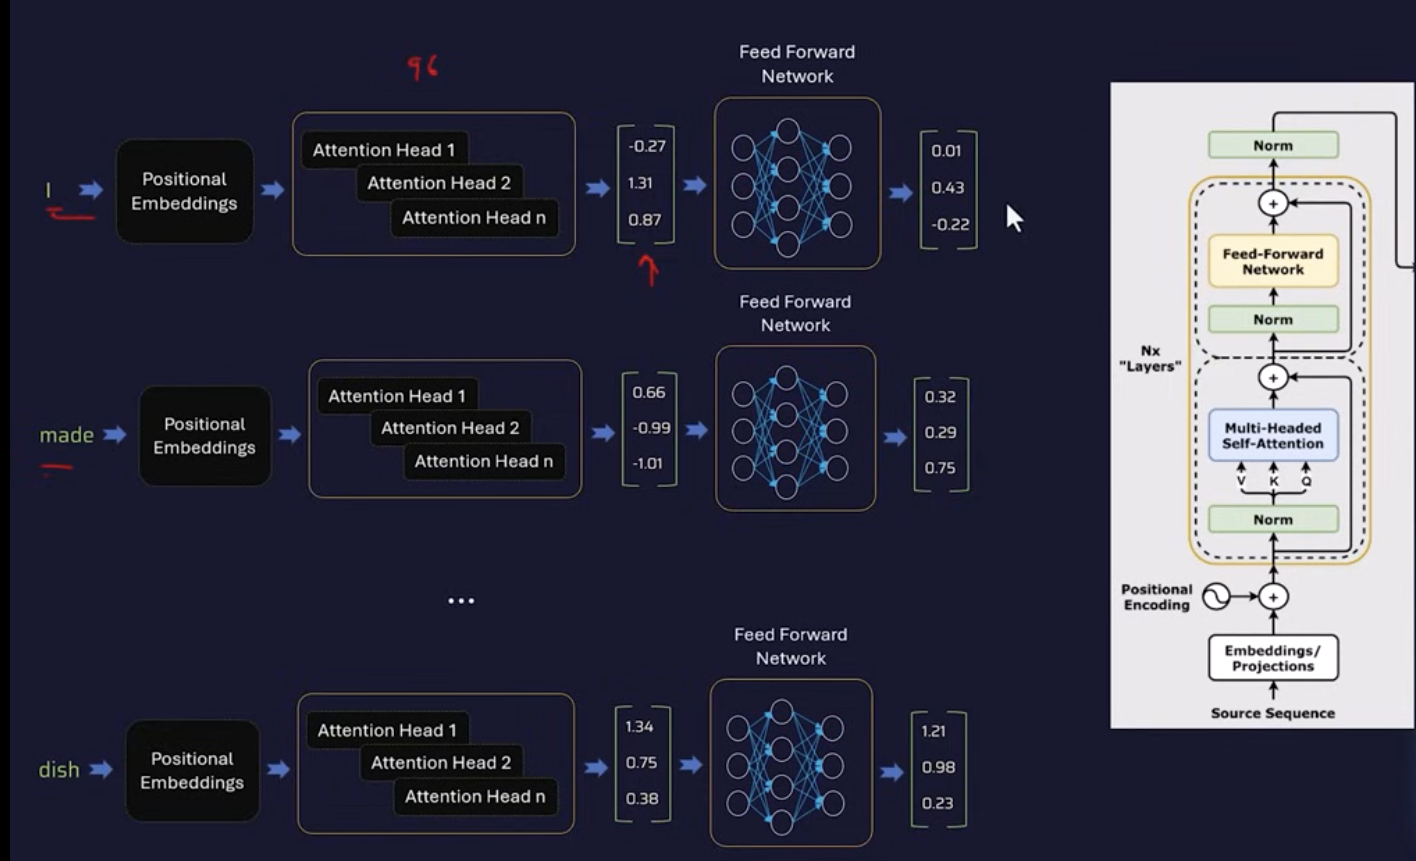

In [4]:
image = Image.open('Screenshot 2025-05-07 at 16.03.40.png')

display(image)

Yukarıda da bu dediklerimin aynen 1 cümledeki her kelime için uygulanışı görülmektedir.

Tüm bu cümledeki kelimelerin sonuçları toplanır ve normalizasyon yapılarak sonuç elde edilir.

### Bu sadece encoder partdır ona göre

BERT gibi Transformer mimarilerinde her encoder layer’ın girdisi, bir önceki encoder layer’ın çıktısıdır.

⸻

🧠 BERT’te Eğitim ve Contextual Embedding Süreci:

🔹 1. Eğitim (Training) Aşaması:

Bu aşamada model sadece öğrenir, herhangi bir anlam çıkarma değil, parametre öğrenimi vardır.
	•	Cümleler modele verilir.
	•	Her encoder katmanındaki:
	•	W_Q, W_K, W_V
	•	Feed-forward katmanları
	•	LayerNorm, bias vs.
👉 Tüm bu parametreler loss’a göre optimize edilir (backpropagation).
	•	Eğitim görevleri:
	•	Masked Language Modeling
	•	Next Sentence Prediction

⏳ Bu süreç bittikten sonra model artık eğitilmiş olur.

⸻

🔹 2. Contextual Embedding Üretimi (Inference):

Eğitilmiş modeli kullanarak artık:
	•	Yeni bir cümle veririz.
	•	Bu cümle modelden geçerken:
	•	W_Q, W_K, W_V gibi parametreler artık değişmez.
	•	Bu parametrelerle Q, K, V hesaplanır.
	•	Self-attention sayesinde kelimeler kendi context’lerine göre etkileşir.
	•	Bu işlem encoder katmanları boyunca devam eder.

🧩 Sonuç:
	•	Her kelimenin anlamsal (contextual) vektörü çıkmış olur.
	•	Örneğin bank kelimesi farklı cümlelerde farklı embedding’ler alır.

⸻

✅ Kısaca:

Aşama	Amaç	W_Q, W_K, W_V Durumu
🎓 Training	Parametre öğrenme	Güncellenir (eğitilir)
🚀 Inference	Anlam çıkarma (contextual embedding)	Sabittir (kullanılır)



⸻

İstersen bu süreci 2 bloklu bir görsel diyagram olarak da çizebilirim. Görsel ister misin?

Kısaca öncelikle normal bir NN gibi eğitilir IO lara göre.Daha sonra contextual embedding için ona artık kelimeler verebiliriz.

Eğer kendin bir Masked language modelını eğitiyorsan kendin y leri belirlersin.Bunun 2 tane spesifik görevi vardır.

⸻

✅ 1. Masked Language Modeling (MLM)

Amaç: Cümledeki rastgele bazı kelimeleri maskeler ve bu maskelenen kelimeleri tahmin etmeye çalışır.
🔹 Bu görev, modelin kelimenin bağlamını (context) anlayarak doğru kelimeyi tahmin etmesini öğretir.
📌 Örnek:

Girdi:    "Kedi [MASK] süt içti."
Hedef:    "sabah"



⸻

✅ 2. Next Sentence Prediction (NSP)

Amaç: İki cümlenin birbiriyle mantıksal olarak bağlantılı olup olmadığını tahmin etmektir.
🔹 Bu görev, modelin cümleler arası ilişki kurmayı öğrenmesini sağlar.
📌 Örnek:

Cümle A: "Ali okula gitti."
Cümle B: "Ders zili çaldı."
Hedef:  "B: Gerçek devam cümle mi?" → Evet (IsNext)



⸻

🔽 Kısaca Özet Not:

Görev	Amaç	Ne Öğretir?
MLM	Maskelenen kelimeyi tahmin et	Kelimenin bağlamını (context) anlama
NSP	Cümlelerin bağlantılı olup olmadığını tahmin et	Cümleler arası anlam ilişkisini öğrenme



⸻

İstersen bu tabloyu veya notu düzenleyip sana PDF ya da görsel olarak da sunabilirim. Yardım edeyim mi?

### DECODER MİMARİSİ

Bu mimaride daha çok çeviri metin üretimi gibi şeyler yapılır.Encoder sadece anlamamızı saglar herşeyi.

### Encoder sonrası sınıflandırma gibi işlemler için her cümlenin bir vektörü olmalıdır.Bunun iin yaygın yaklaşımlar şunlardır.

	1.	[CLS] Token’ı Kullanma:
	•	BERT gibi modellerde, cümlenin genel anlamını temsil etmek için [CLS] token’ı kullanılır.
	•	Encoder çıktısından, [CLS] token’ının vektörü alınarak sınıflandırma işlemi yapılır.
	2.	Mean Pooling (Ortalama Havuzlama):
	•	Encoder çıktısındaki tüm token’ların vektörlerinin ortalaması alınarak cümleyi temsil eden tek bir vektör elde edilir.
	•	Bu ortalama vektör, sınıflandırma için kullanılabilir.
	3.	Max Pooling (Maksimum Havuzlama):
	•	Encoder çıktısındaki tüm token’ların maksimum değerini alarak, cümleyi temsil eden tek bir vektör elde edilir.
	•	Bu vektör, sınıflandırma için kullanılabilir.

Her bir yöntem, modelin çıkardığı contextual embeddings’i farklı şekilde işleyerek sınıflandırma işlemi için cümleyi temsil eden bir vektör oluşturur.